# Machine Learning Exercise 1 - Linear Regression

## Linear regression with one variable

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('ex1data1.txt', header = None, names = ['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


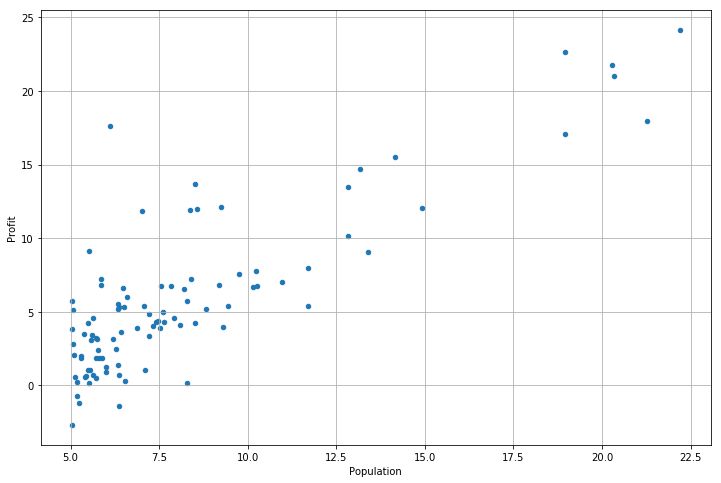

In [9]:
data.plot(kind = 'scatter', x = 'Population', y = 'Profit', figsize = (12, 8))
plt.grid(True)

In [42]:
cols = data.shape[1]
X = data.iloc[:, 0:cols - 1]
X.insert(0, 'Ones', 1)
X = X.values
y = data.iloc[:, cols-1:cols]
y = y.values
theta = np.zeros([2, 1])
iterations = 1500
alpha = 0.01

In [45]:
X[:5, ]

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598]])

In [46]:
theta

array([[ 0.],
       [ 0.]])

In [47]:
def computeCost(X, y, theta):
    inner = np.power(X @ theta - y, 2)
    return np.sum(inner) / (2 * X.shape[0])

In [48]:
computeCost(X, y, theta)

32.072733877455676

In [111]:
def gradientDescent(X, y, theta, alpha, iterations):
    tempTheta = np.zeros(theta.shape)
    cost = np.zeros(iterations)
    thetaHistory = np.zeros([theta.shape[0], iterations])
    for i in range(iterations):
        error = X @ theta - y
        for j in range(theta.shape[0]):
            term = error.T @ X[:, j]
            tempTheta[j, 0] = tempTheta[j, 0] - ((alpha/len(X)) * np.sum(term))
        theta = tempTheta
        cost[i] = computeCost(X, y, theta)
        thetaHistory[:, i] = theta.reshape([1, thetaHistory.shape[0]])
    return theta, cost, thetaHistory

In [112]:
g, cost, thetaHistory = gradientDescent(X, y, theta, alpha, 1000)
g

array([[-3.24140214],
       [ 1.1272942 ]])

In [95]:
computeCost(X, y, g)

4.5159555030789136

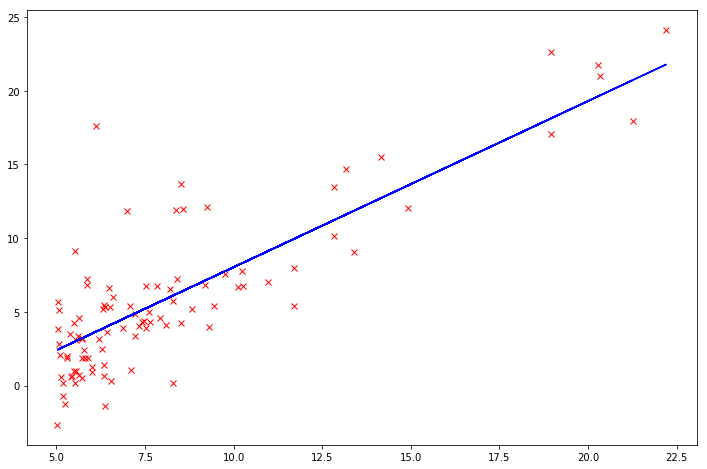

In [100]:
plt.figure(figsize=(12, 8))
plt.plot(X[:, 1], y, 'rx', label = 'Training data')
myfit = g[0, 0] + X[:, 1] * g[1, 0]
plt.plot(X[:, 1], myfit, 'b-', label = 'Predict data')

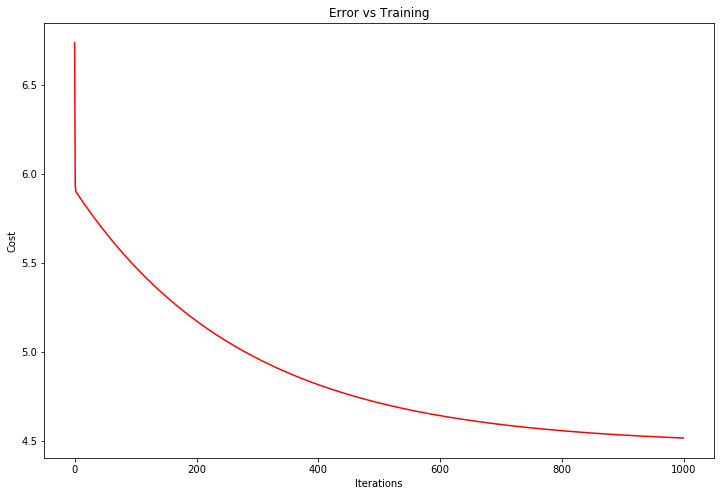

In [102]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(np.arange(1000), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Training')

## Linear regression with multiple variables

In [103]:
data2 = pd.read_csv('ex1data2.txt', header = None, names = ['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [104]:
data2 = (data2 - data2.mean())/data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [107]:
data2.insert(0, 'Ones', 1)

cols = data2.shape[1]
X2 = data2.iloc[:, 0:cols - 1].values
y2 = data2.iloc[:, cols-1:cols].values
theta2 = np.zeros([3, 1])

In [108]:
X2.shape, y2.shape, theta2.shape

((47, 3), (47, 1), (3, 1))

In [113]:
g2, cost2, thetaHistory2 = gradientDescent(X2, y2, theta2, alpha, 1000)

In [114]:
computeCost(X2, y2, g2)

0.13070336960771892

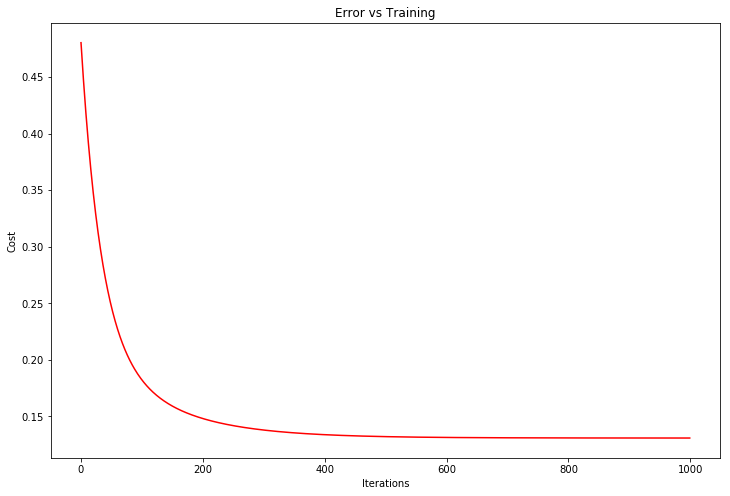

In [115]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(np.arange(1000), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Training')

## Use scikit-learn

In [116]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

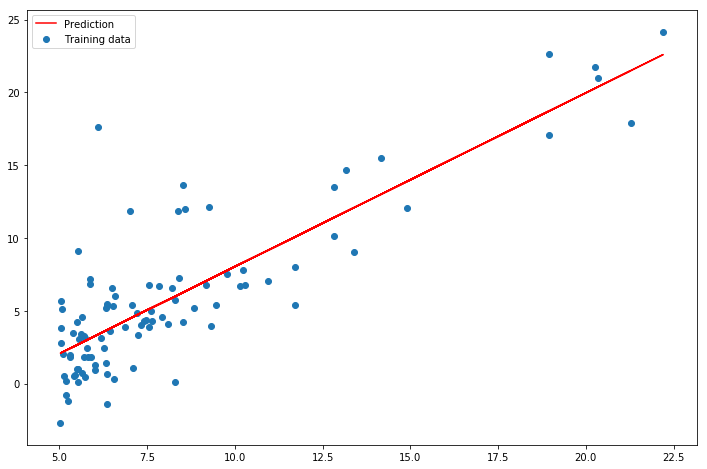

In [120]:
x = X[:, 1]
f = model.predict(X)

fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(x, f, 'r', label = 'Prediction')
ax.scatter(data.Population, data.Profit, label = 'Training data')
ax.legend(loc = 2)